                   Colunas                                                                             Valores
0         Nome das classes  Pente, T, Desodorante, Tesoura, Borracha, Luva, Carregador, Coracao, Sapo, Remedio
1        Número de classes                                                                                  10
2        Número de imagens                                                                                  24
3  Tamanho da base (bytes)                                                                               16384
4    Resolução das imagens                                                                         (720, 1600)


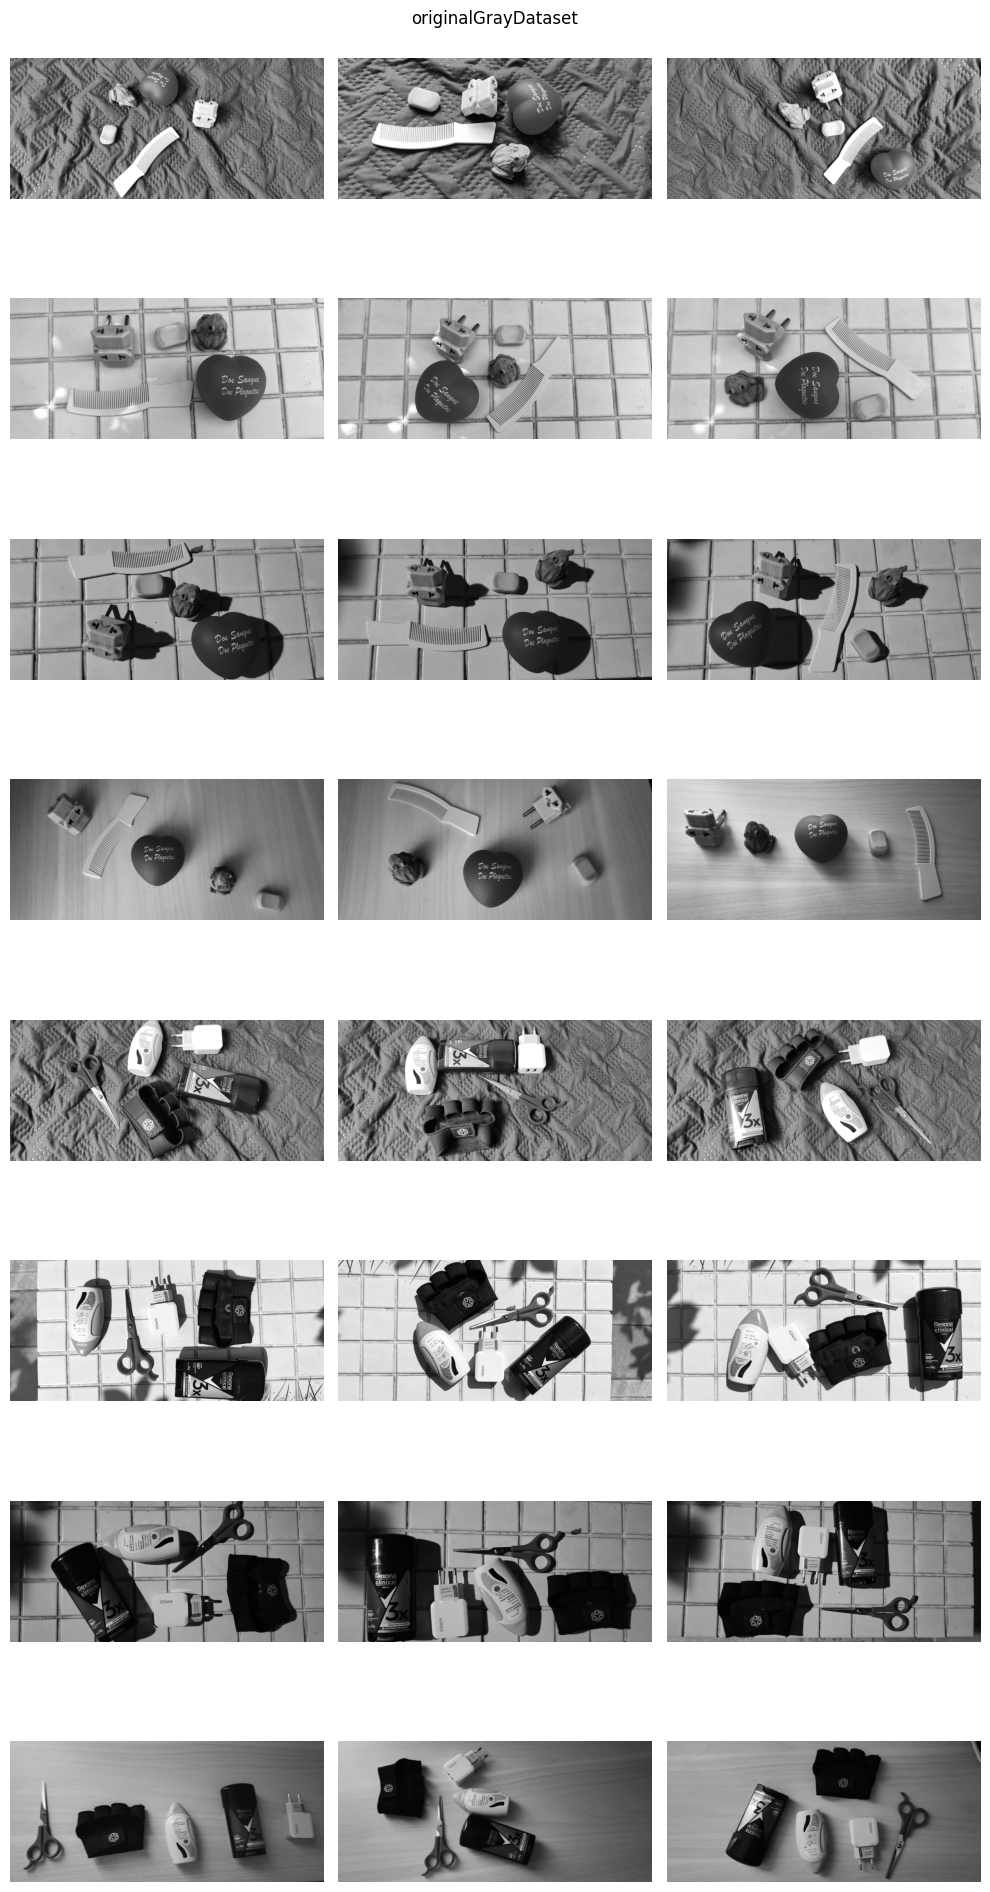

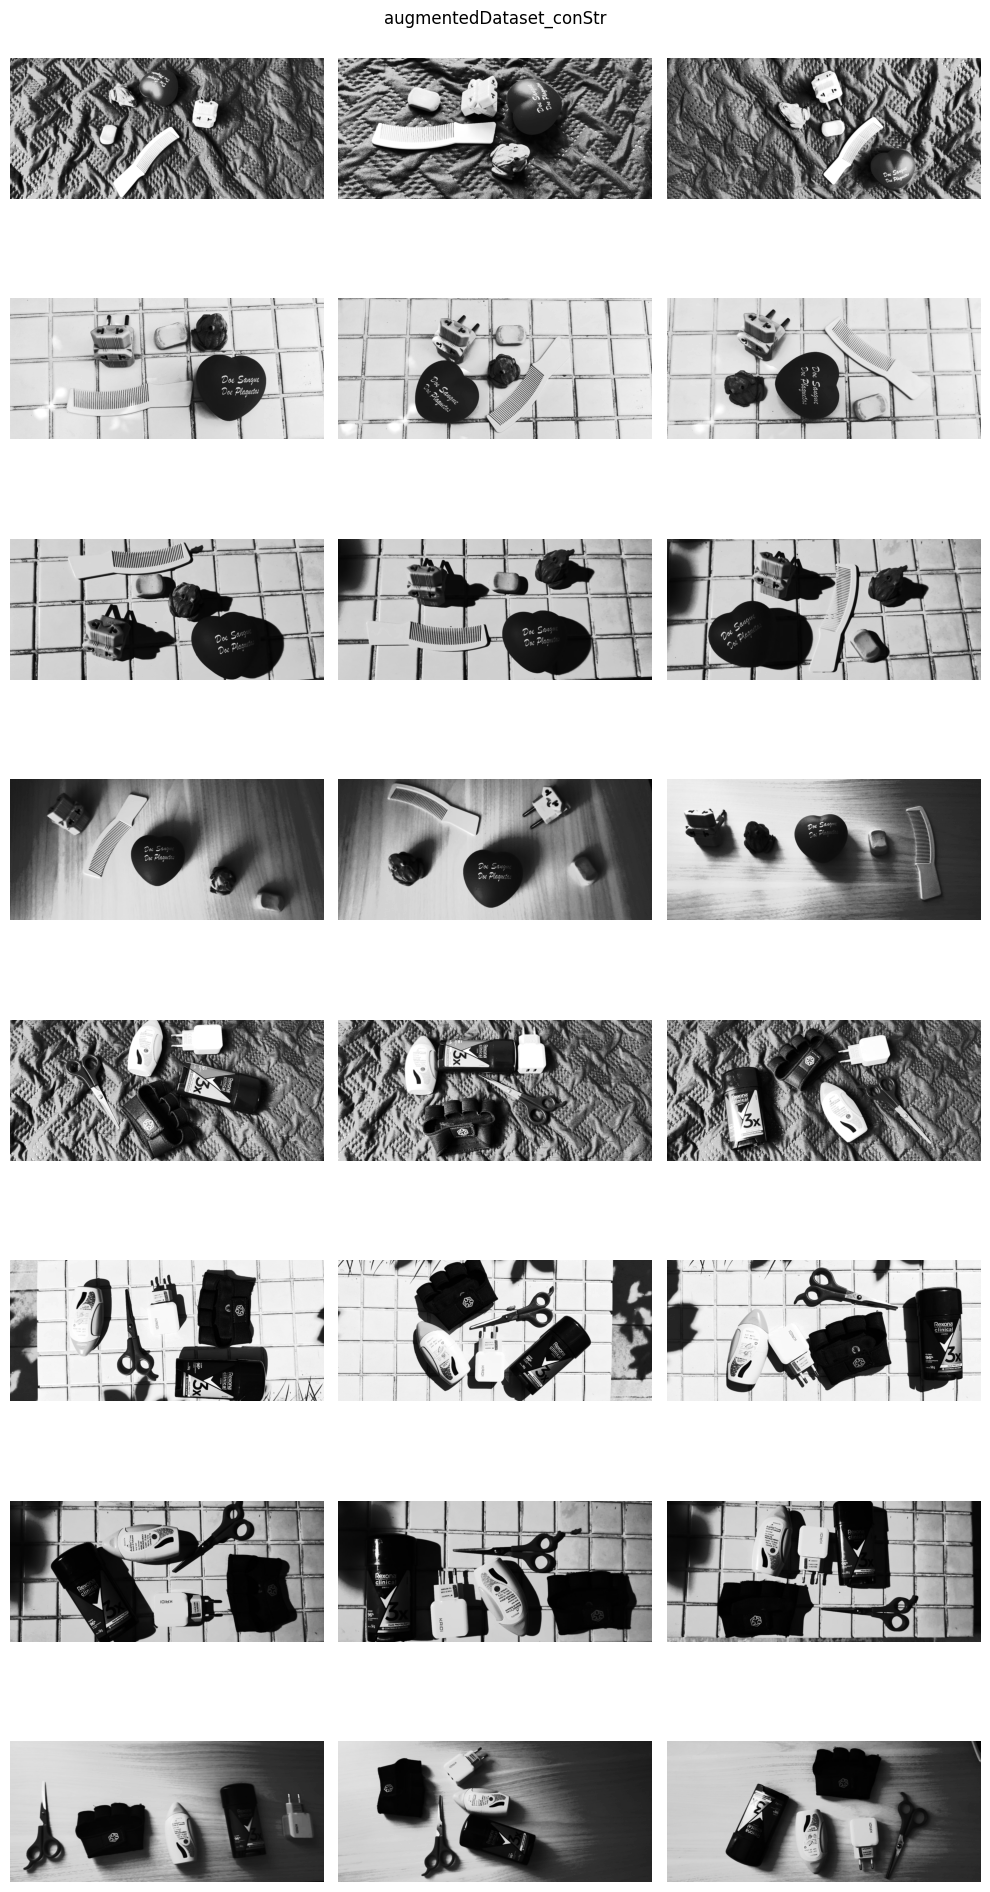

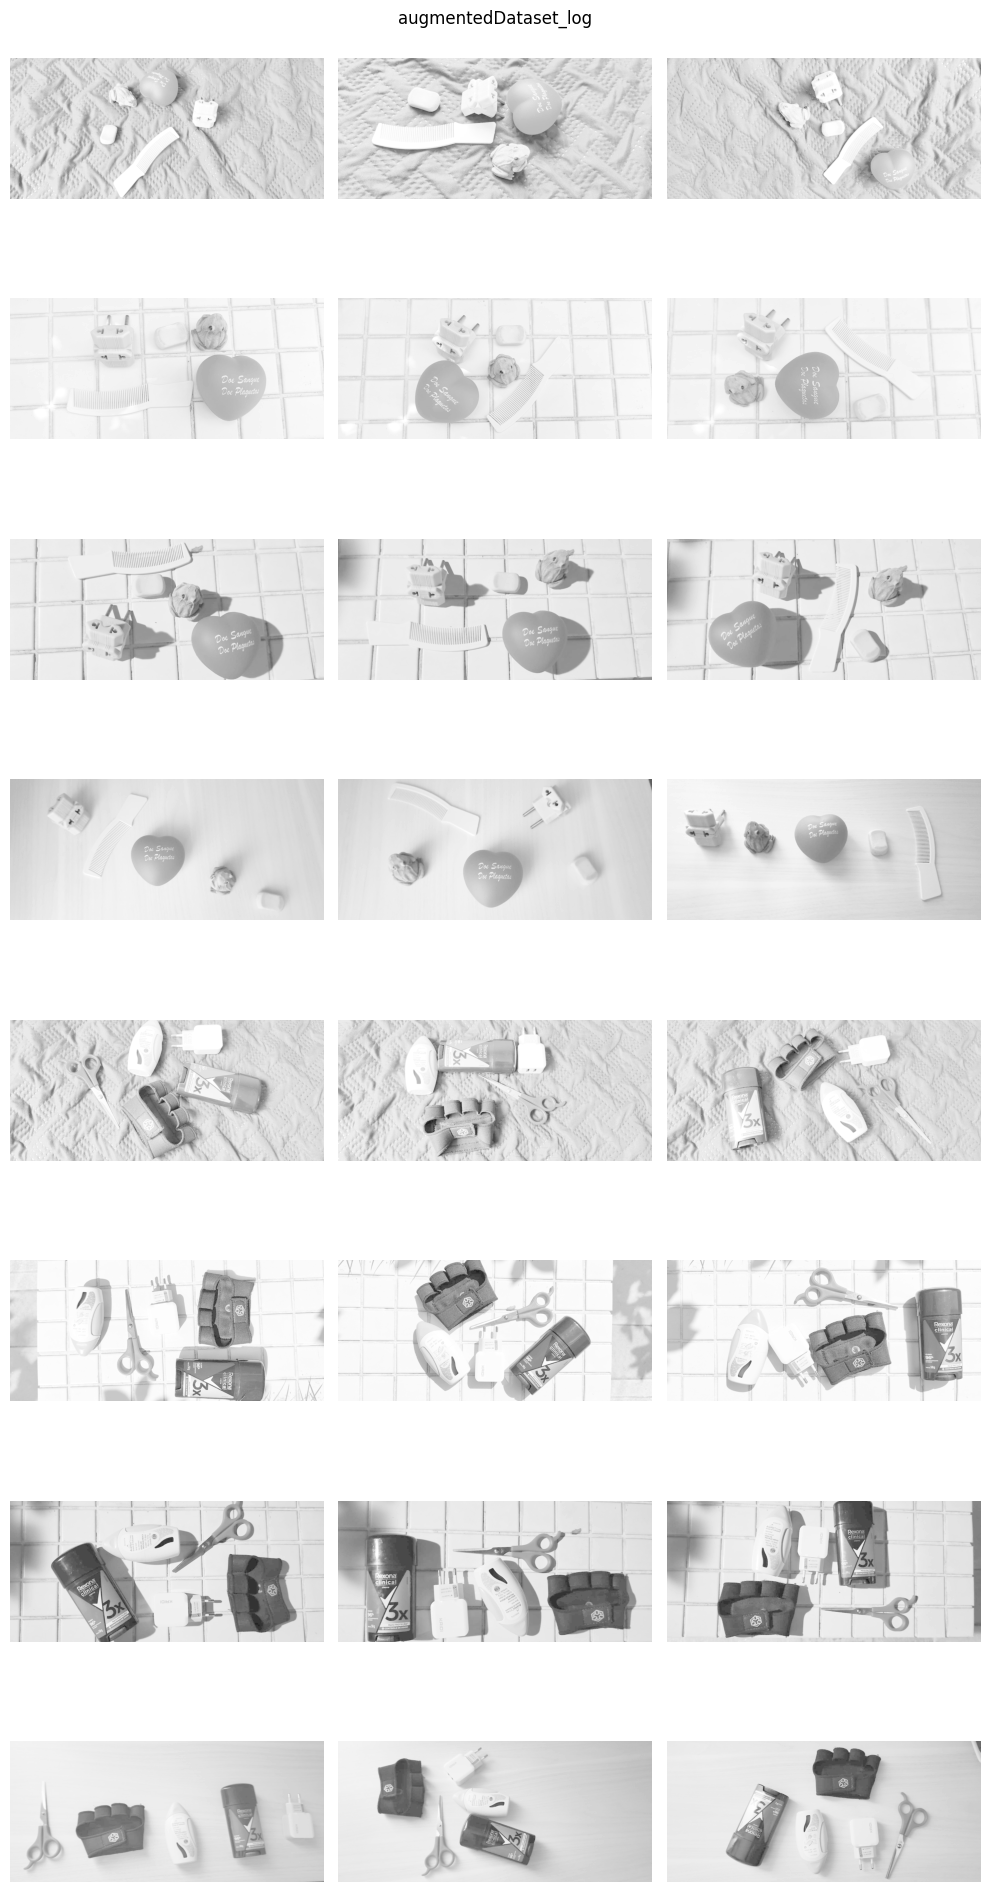

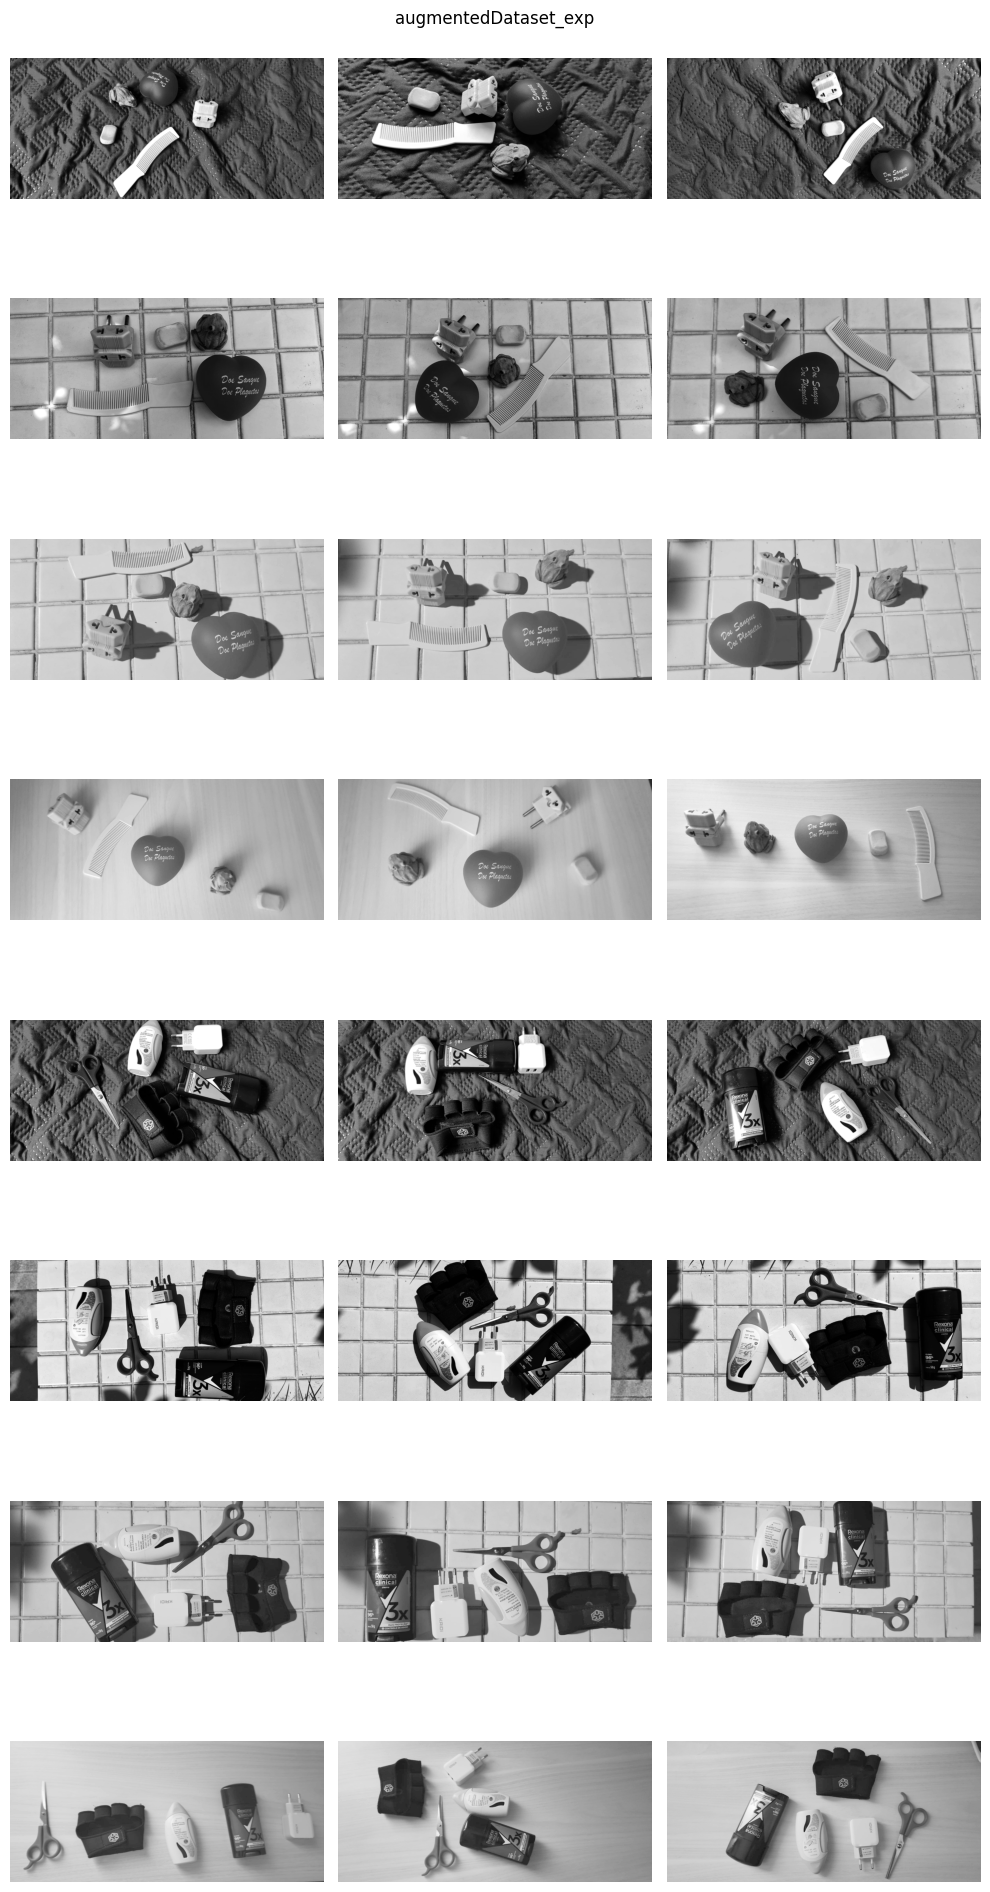

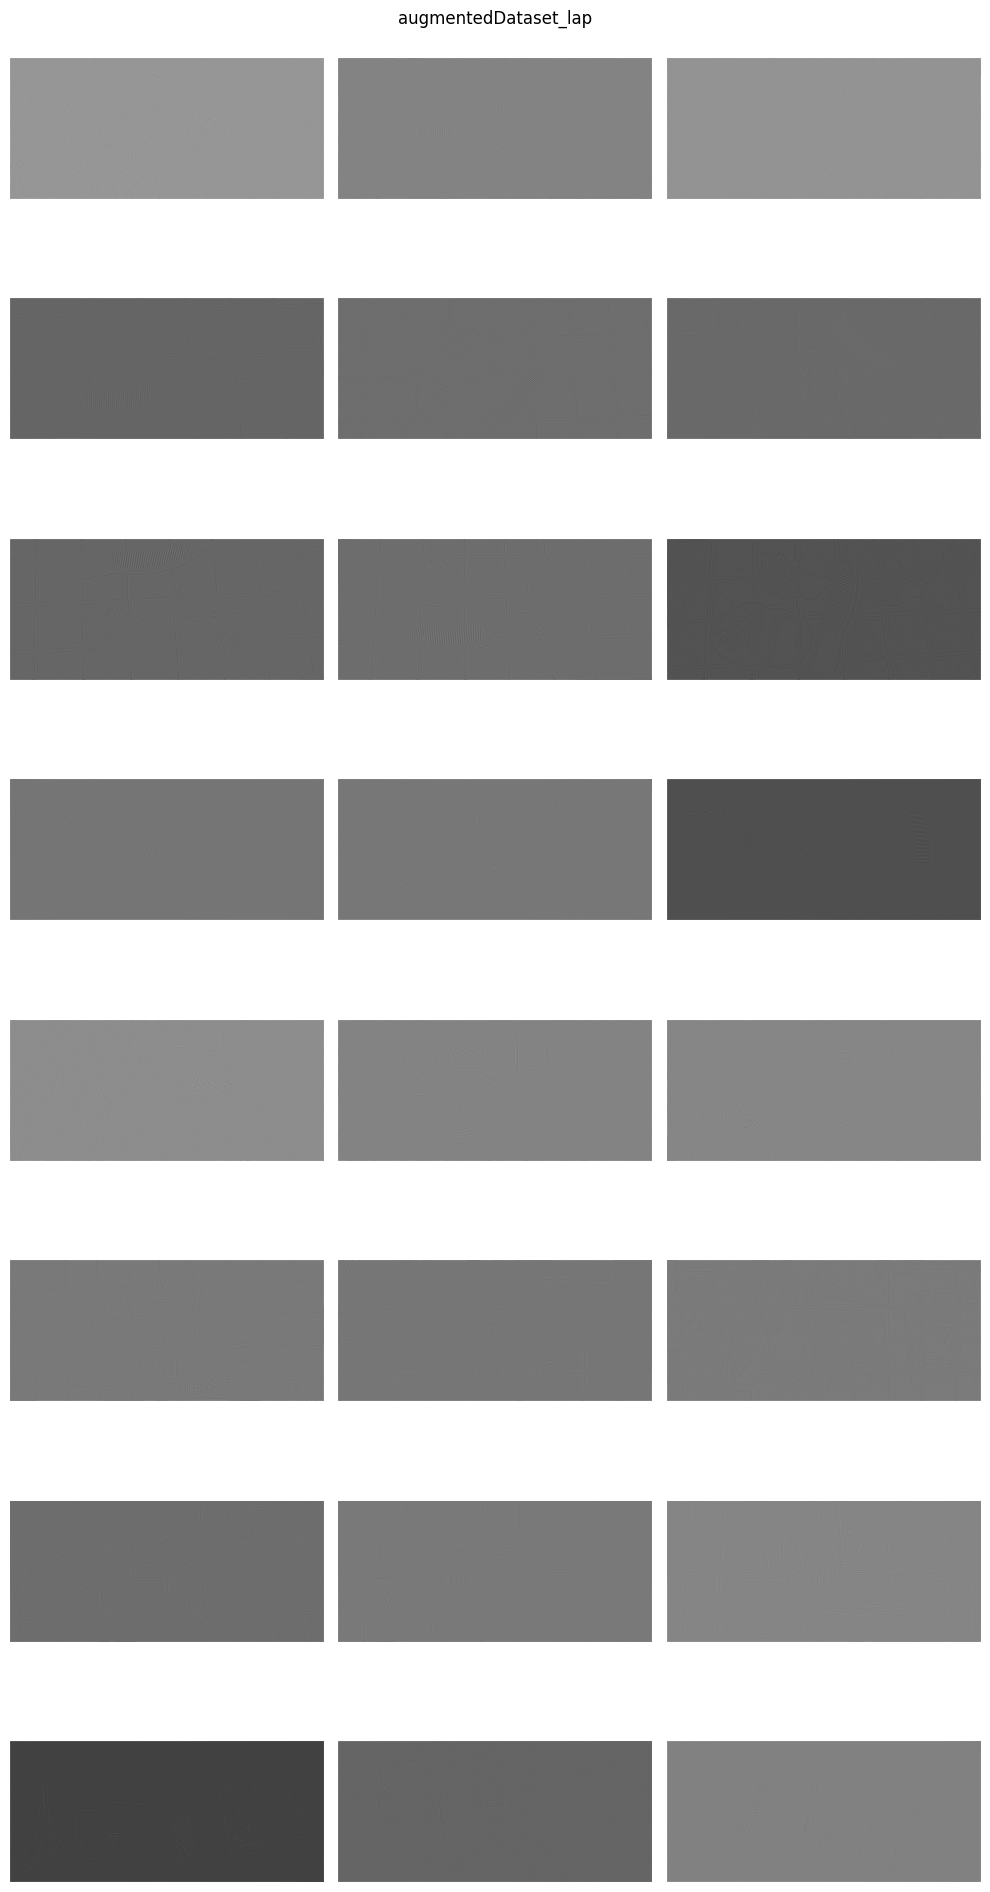

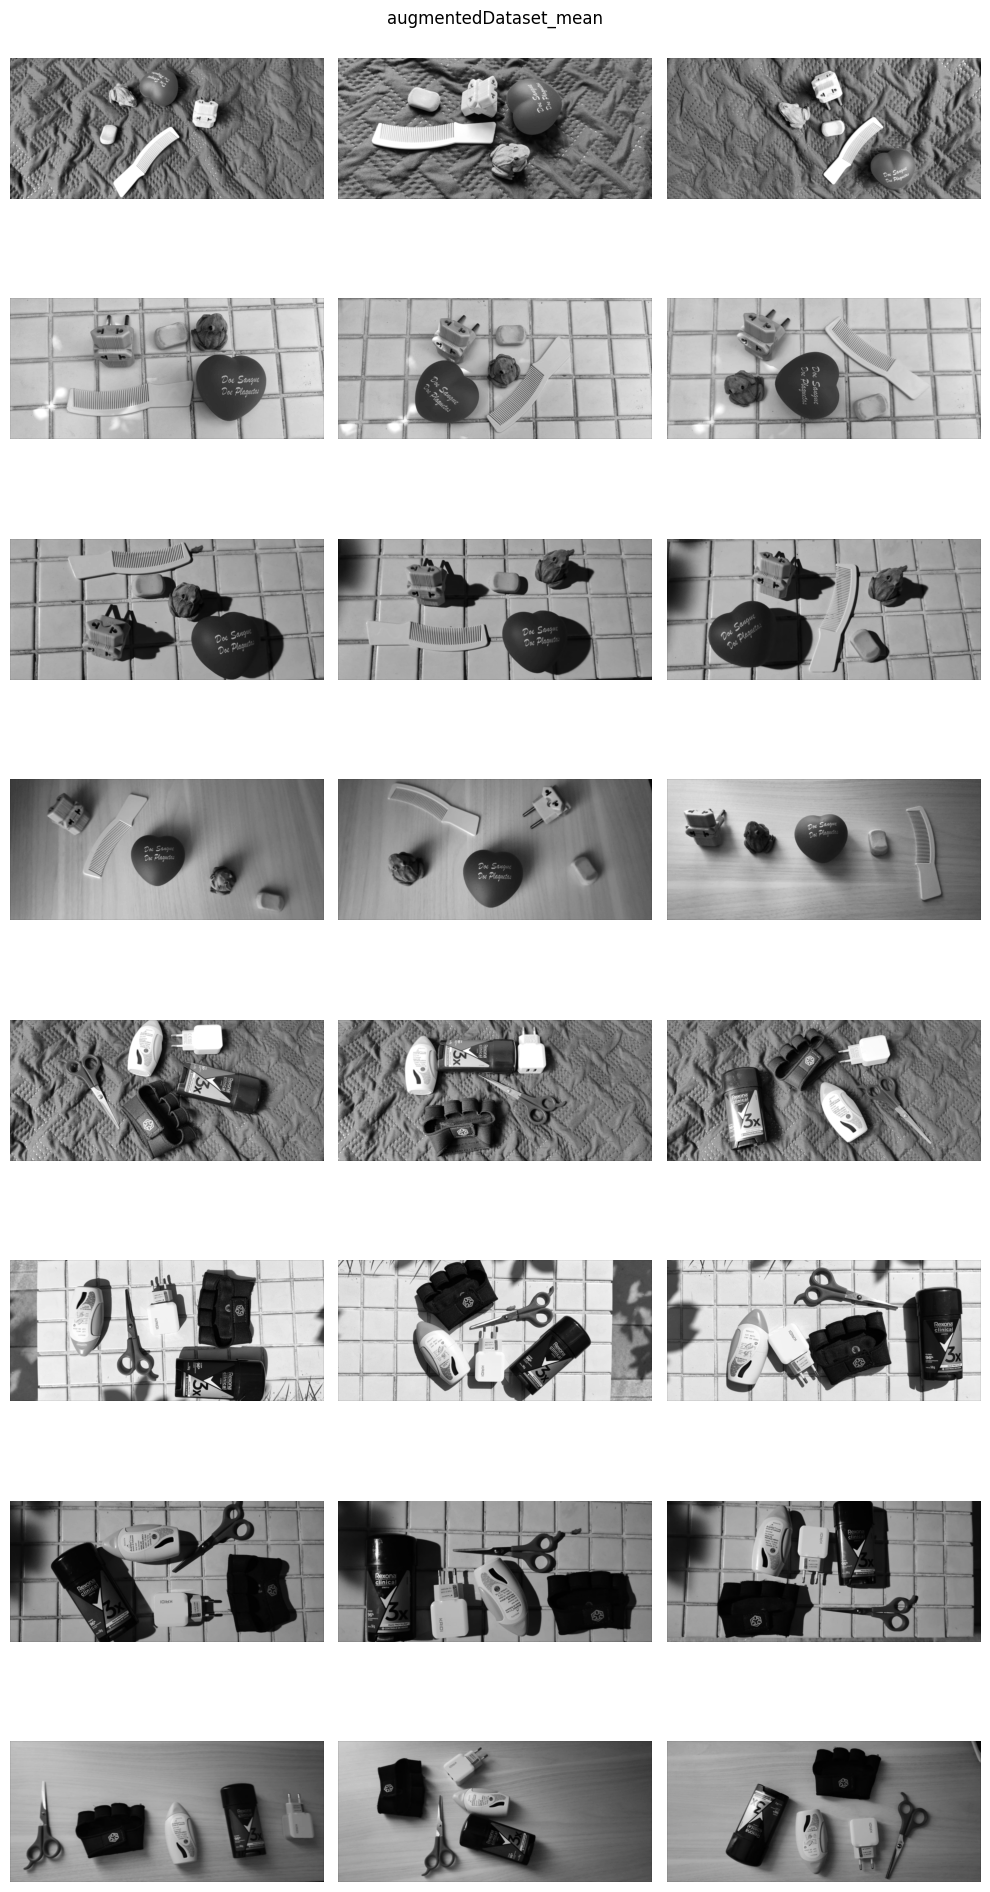

In [1]:
# @title
### EP2 MAC0417 / MAC5768
##################################################################
# AO PREENCHER ESSE CABEÇALHO COM O MEU NOME E O MEU NÚMERO USP,#
# DECLARO QUE SOU O ÚNICO AUTOR E RESPONSÁVEL PELA RESOLUÇÃO #
# DESTE EP. #
# TODAS AS PARTES FORAM DESENVOLVIDAS E IMPLEMENTADAS POR MIM, #
# SEGUINDO AS INSTRUÇÕES E QUE PORTANTO, NÃO CONSTITUEM #
# DESONESTIDADE ACADÊMICA OU PLÁGIO. #
# #
# DECLARO TAMBÉM, QUE SOU RESPONSÁVEL POR TODAS AS CÓPIAS #
# DESSE PROGRAMA, E QUE EU NÃO DISTRIBUI OU FACILITEI A #
# SUA DISTRIBUIÇÃO. ESTOU CIENTE QUE OS CASOS DE PLÁGIO E #
# DESONESTIDADE ACADÊMICA SERÃO TRATADOS SEGUNDO OS CRITÉRIOS #
# DEFINIDOS NO CÓDIGO DE ÉTICA DA USP. #
# #
# ENTENDO QUE JUPYTER NOTEBOOKS SEM ASSINATURA NÃO SERÃO #
# CORRIGIDOS E, AINDA ASSIM, PODERÃO SER PUNIDOS POR #
# DESONESTIDADE ACADÊMICA. #
# #
# #
# Nome : Fábio Baptista Cardoso #
# NUSP : 12557313 #
# Turma: 2024145 #
# Prof.: Ronaldo Fumio Hashimoto  #
##################################################################

# PARTE 1 #

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import os
import pandas as pd
from cv2 import imwrite

def plot_img(fig, titulo):
  plt.figure(figsize=(10,10))
  plt.imshow(fig, cmap='gray', vmin=0, vmax=255)
  plt.title(titulo)
  plt.axis('off')
  plt.show()

def plot8x3(images, title=''):
    fig, axs = plt.subplots(8, 3, figsize=(10, 20))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.suptitle(title)
    plt.show()

# Tabela sumária dos dados

dir_path = './imgs'
files = os.listdir(dir_path)
classes = set()

for file in files:
    iStart = file.index('Classes(')
    iEnd = file.index(')')
    classes = classes.union(set(file[iStart + 8:iEnd].split(','))) # Pegando todas as classes presentes nas imagens

dados = {
    "Colunas": ["Nome das classes", "Número de classes", "Número de imagens", "Tamanho da base (bytes)", "Resolução das imagens"],
    "Valores": [', '.join(classes), len(classes), len(files), os.path.getsize(dir_path), imread(dir_path + '/' + files[0]).shape[0:2]]
}
df = pd.DataFrame(dados)
print(df.to_string()) # Plotando a tabela

# Funções de transformação de imagens

def RGB2gray(imgs):
    originalGrayDataset = []
    rgb_gray = [0.2989, 0.5870, 0.1140]
    for img in imgs:
        originalGrayDataset += [np.dot(imread(dir_path + '/' + img).astype(float), rgb_gray)] # Transformando em imagens em escala de cinza
    
    save_dir = './originalGrayDataset'
    os.makedirs(save_dir, exist_ok=True)
    for i, img in enumerate(originalGrayDataset):
        file_name = f'gray_{files[i]}'
        file_path = os.path.join(save_dir, file_name)
        imwrite(file_path, img)
    return originalGrayDataset
    
def saveImage(img, transform='', save_dir='./augmentedDataset'):
    save_dirT = f'{save_dir}/{transform}'
    os.makedirs(save_dirT, exist_ok=True)
    file_name = f'{transform}_{grayFiles[i]}'
    file_path = os.path.join(save_dirT, file_name)
    imwrite(file_path, img)

def contrastStretching(img):
    # desenhei no geogebra uma função que partia de (0,0) e ia até (100,50), depois de (100,150) até (150,200) e de (150,200) até (255,255)
    # sendo que na primeira parte a função é f(x) = x/2 (escurece essa faixa de pixels), na segunda f(x) = 3x - 250 (escurece e ilumina a faixa de pixels)
    # e na terceira f(x) = 55x/105 + 200 - 55*150/105 (ilumina a faixa de pixels). No final, pixels menores que 125 ficam mais escuros e pixels maiores que 125 ficam mais claros.
    imgNova = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if 0 <= img[i][j] < 100:
                imgNova[i][j] = img[i][j] / 2
            elif 100 <= img[i][j] < 150:
                imgNova[i][j] = img[i][j] * 3 - 250
            else:
                imgNova[i][j] = img[i][j] * 55 / 105 + 200 - 55 * 150 / 105
    saveImage(imgNova, 'conStr')
    return imgNova

def constantsForIluminacao(file): # DETERMINAR C E GAMMA
    '''
    Recebe o nome do arquivo e retorna os valores de c e gamma baseado na iluminação e no ambiente
    presentes no próprio nome do arquivo
    '''
    iStart = file.index('Iluminacao(') + 11
    iEnd = file[iStart : ].index(')') + iStart
    ilum, amb = file[iStart : iEnd].split('X')
    c = {'Dentrodecasa': 1, 'Foradecasa': 1.5}[ilum]
    gamma = {'Dia': 1.5, 'Noite': 0.5}[amb]
    return c, gamma

def log(img, c=1):
    imgNova = np.zeros(img.shape)
    imgNova = c * np.log(1 + img)
    imgNova = imgNova - imgNova.min()
    imgNova = imgNova * 255 / imgNova.max()
    saveImage(imgNova, 'log')
    return imgNova

def exponencial(img, c=1, gamma=1):
    imgNova = np.zeros(img.shape)
    imgNova = c * np.power(img, gamma)
    imgNova = imgNova - imgNova.min()
    imgNova = imgNova * 255 / imgNova.max()
    saveImage(imgNova, 'exp')
    return imgNova

def laplacian(img):
    imgNova = np.zeros(img.shape)
    laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    imgNova = np.pad(img, 1, mode='constant')
    imgNova = np.array([[np.sum(imgNova[i:i+3, j:j+3] * laplacian) for j in range(imgNova.shape[1] - 2)] for i in range(imgNova.shape[0] - 2)])
    imgNova = imgNova - imgNova.min()
    imgNova = imgNova * 255 / imgNova.max()
    saveImage(imgNova, 'lap')
    return imgNova

def mean(img):
    imgNova = np.zeros(img.shape)
    mean = np.array([[1,1,1],[1,1,1],[1,1,1]]) / 9 # filtro simétrico, correlação == convolução
    imgNova = np.pad(img, 1, mode='constant')
    imgNova = np.array([[np.sum(imgNova[i:i+3, j:j+3] * mean) for j in range(imgNova.shape[1] - 2)] for i in range(imgNova.shape[0] - 2)])
    imgNova = imgNova - imgNova.min()
    imgNova = imgNova * 255 / imgNova.max()
    saveImage(imgNova, 'mean')
    return imgNova

originalGrayDataset = RGB2gray(files) # salva as imagens em escala de cinza em /originalGrayDataset
dir_path = './originalGrayDataset'
grayFiles = os.listdir(dir_path)
# originalGrayDataset = [imread(f'{dir_path}/{grayImg}').astype(float) for grayImg in grayFiles]
plot8x3(originalGrayDataset, 'originalGrayDataset')

augmentedDataset = []
save_dir = './augmentedDataset'
os.makedirs(save_dir, exist_ok=True)
for i, img in enumerate(originalGrayDataset):
    augmentedDataset += [contrastStretching(img)]
    c, gamma = constantsForIluminacao(grayFiles[i])
    augmentedDataset += [log(img, c)]
    augmentedDataset += [exponencial(img, c, gamma)]
    augmentedDataset += [laplacian(img)]
    augmentedDataset += [mean(img)]
# Esse código salva as imagens em /augmentedDataset/conStr, /augmentedDataset/log, /augmentedDataset/exp, /augmentedDataset/lap e /augmentedDataset/mean

dir_path = './augmentedDataset'
transformList = ['conStr', 'log', 'exp', 'lap', 'mean']
for transform in transformList:
    augmentedDataset = [imread(f'{dir_path}/{transform}/{augmentedImg}').astype(float) for augmentedImg in os.listdir(dir_path + '/' + transform)]
    plot8x3(augmentedDataset, f'augmentedDataset_{transform}')
    